In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [154]:
def y2indicator(y,K):
    N = len(y)
    indicator = np.zeros((N,K))
    for i in range(N):
        indicator[i, y[i]] = 1
    return indicator

In [155]:
def get_data(s):
    df = pd.read_csv(s)
    #data = df.as_matrix()
    data = df.values
    
    X = data[:,:-1]
    Y = data[:,-1]
    
    # normalize the numerical column
    X[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()
    X[:,2] = (X[:,2] - X[:,2].mean())/X[:,2].std()
    
    #number of samples = N
    #number of inputs = D
    N, D = X.shape
    X2 = np.zeros((N, D + 3))
    X2[:,0:(D-1)] = X[:,0:(D-1)]
    
    for n in range(N):
        t = int(X[n,D-1])
        X2[n, t+D-1] = 1
        X = X2
    return X, Y

In [156]:
def softmax(a):
    expA = np.exp(a)
    return expA / expA.sum(axis = 1, keepdims=True)

In [157]:
def forward(X, W1, b1, W2, b2):
    Z = np.tanh(X.dot(W1) + b1)
    return softmax(Z.dot(W2) + b2) , Z

In [158]:
def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

In [159]:
#get the accurracy 
def classification_rate(Y, P):
    return np.mean(Y == P)

In [160]:
def cross_entropy_cost(T, pY):
    return -np.mean(T*np.log(pY))

In [161]:
def derivative_w2(Z, T, Y):
    N, K = T.shape
    M = Z.shape[1]
    
    return Z.T.dot(T-Y)

def derivative_b2(T,Y):
    return(T-Y).sum(axis=0)

In [162]:
def derivative_w1(X, Z, T, Y, W2):
    N, D = X.shape
    M, K = W2.shape
    dZ = (T-Y).dot(W2.T) * Z *(1-Z)
    ret2 = X.T.dot(dZ)
    return ret2

def derivative_b1(T, Y, W2, Z):
    return ((T-Y).dot(W2.T)*Z*(1-Z)).sum(axis=0)

In [163]:
X, Y = get_data('data.csv')
X, Y = shuffle(X, Y)
Y = Y.astype(np.int32)
M = 5
D = X.shape[1] # number of input units (8) 
K = len(set(Y)) #number of classes (4)

Xtrain = X[:-100]
Ytrain = Y[:-100]
Ytrain_ind = y2indicator(Ytrain, K)
Xtest = X[-100:]
Ytest = Y[-100:]
Ytest_ind = y2indicator(Ytest, K)
W1 = np.random.randn(D,M)
b1 = np.zeros(M)
W2 = np.random.randn(M,K)
b2 = np.zeros(K)

0 0.5611908338827536 0.5774470426655349
1000 0.13171712953565107 0.1449350014636445
2000 0.12120159087487119 0.13827278798956674
3000 0.10667484703668678 0.1287544811755728
4000 0.10638621155603391 0.12595242128218861
5000 0.10621229103388678 0.12181252308909685
6000 0.10241941590325411 0.11878232638307208
7000 0.09876955353531869 0.11455828388499505
8000 0.09576314298425587 0.11184913792973634
9000 0.09296337708239352 0.1167437136028654
Final train classiffication rate: 0.83
Final test Classification rate: 0.8


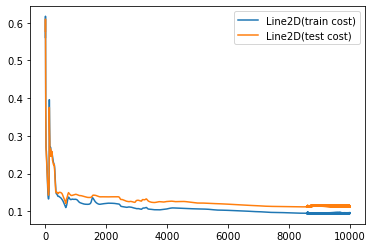

In [164]:
train_cost = []
test_cost = []
learning_rate = 0.001
for i in range(10000):
    pYtrain, Ztrain = forward(Xtrain, W1, b1, W2, b2)
    pYtest, Ztest = forward(Xtest, W1, b1, W2, b2)
    
    ctrain = cross_entropy_cost(Ytrain_ind, pYtrain)
    ctest = cross_entropy_cost(Ytest_ind, pYtest)
    train_cost.append(ctrain)
    test_cost.append(ctest)
    
    W2 -= learning_rate*derivative_w2(Ztrain, pYtrain, Ytrain_ind)
    b2 -= learning_rate*derivative_b2(pYtrain, Ytrain_ind)
    # T = pYtrain
    # Y = Ytrain_ind
    W1 -= learning_rate*derivative_w1(Xtrain, Ztrain, pYtrain, Ytrain_ind, W2)
    b1 -= learning_rate*derivative_b1(pYtrain, Ytrain_ind, W2, Ztrain)
    
    if i % 1000 == 0:
        print(i, ctrain, ctest)

print("Final train classiffication rate:", classification_rate(Ytrain, predict(pYtrain)))
print("Final test Classification rate:", classification_rate(Ytest, predict(pYtest)))

legend1, = plt.plot(train_cost, label = 'train cost')
legend2, = plt.plot(test_cost, label = 'test cost')
plt.legend([legend1,legend2])
plt.show()